---
<p align="center">
  <img src="https://www.portafolio.co/files/article_new_multimedia/uploads/2023/10/12/652828e536642.jpeg" style="width:100%; height:150px; object-fit:cover;"/>
</p>

<h1 align="center" style="color:#FFD700;"> <span style="color:#FFD700;">Optimización del Transporte en Nueva York</span> </h1>

<p align="center">
  <b>Green Taxi | Machine Learning & Data Science | CRISP-DM</b><br>
  <span style="font-size:1.1em;">Análisis y predicción de tarifas y duración de viajes usando datos reales de taxis verdes de NYC.</span>
</p>

## Fase 02 / Data Understanding 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [101]:

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
df = pd.read_parquet(url, engine="pyarrow")


In [102]:
# --- 1. Estadísticas descriptivas ---
# Variables numéricas
num_cols = ["trip_distance", "fare_amount", "tip_amount", "tolls_amount"]

print("=== Estadísticas descriptivas ===")
print(df[num_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))

# Mediana por separado
print("\nMediana de cada variable:")
print(df[num_cols].median())

=== Estadísticas descriptivas ===
       trip_distance   fare_amount    tip_amount  tolls_amount
count   49390.000000  49390.000000  49390.000000  49390.000000
mean       10.120118     18.804332      2.772294      0.273023
std       618.776893     18.127869      3.759889      1.484335
min         0.000000   -200.000000     -0.900000      0.000000
25%         1.260000     10.000000      0.000000      0.000000
50%         2.030000     14.200000      2.160000      0.000000
75%         3.560000     21.200000      4.000000      0.000000
95%         9.735500     49.000000      8.580000      0.000000
99%        17.752200     90.000000     15.980000      6.940000
max     77463.550000    588.200000    153.300000     49.940000

Mediana de cada variable:
trip_distance     2.03
fare_amount      14.20
tip_amount        2.16
tolls_amount      0.00
dtype: float64


En este código se calcula y muestra la media, desviación estándar, etc., para cada variable numérica específica. Además, se imprime la mediana de cada variable por separado.

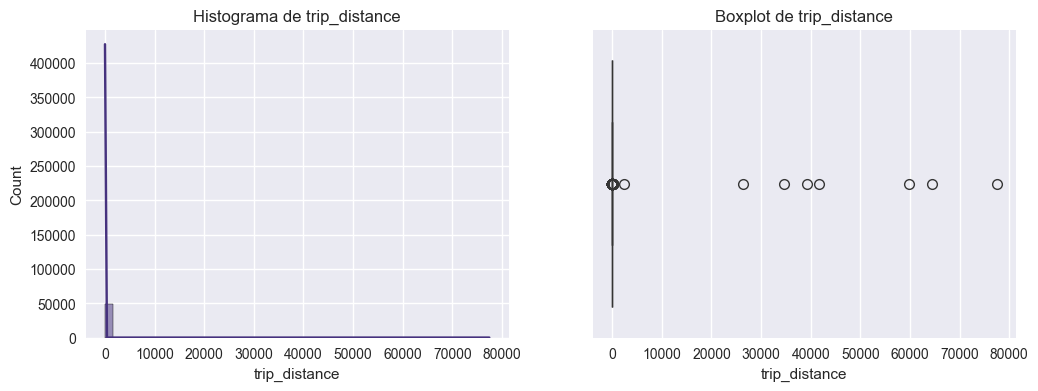

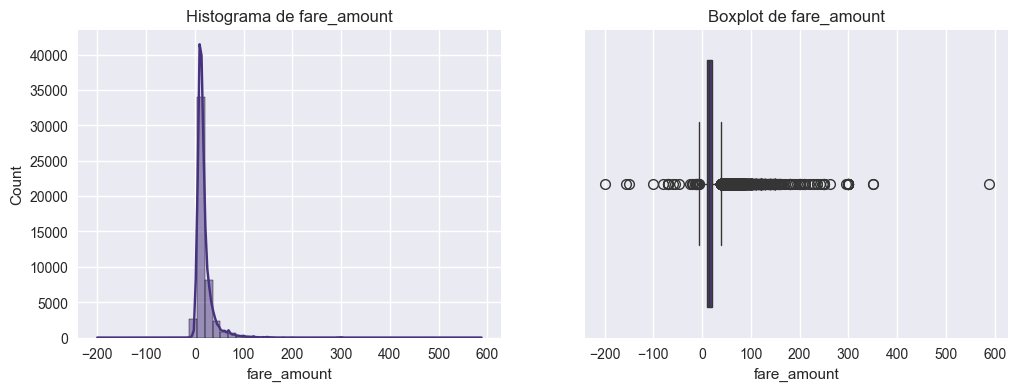

In [103]:
# --- 2. Histogramas y Boxplots ---
for col in ["trip_distance", "fare_amount"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.show()

En este código se generan histogramas y boxplots para las variables numéricas trip_distance y fare_amount. Los histogramas muestran la distribución de los datos, mientras que los boxplots ayudan a identificar posibles outliers.


Frecuencia de valores en payment_type:
payment_type
1.0    74.610240
2.0    24.396448
3.0     0.684136
4.0     0.298213
5.0     0.010964
Name: proportion, dtype: float64


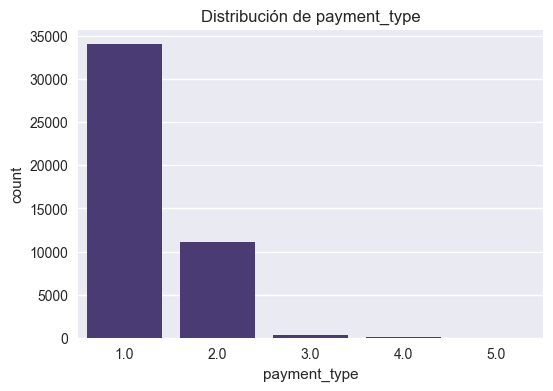


Frecuencia de valores en VendorID:
VendorID
2    85.861510
1    10.599312
6     3.539178
Name: proportion, dtype: float64


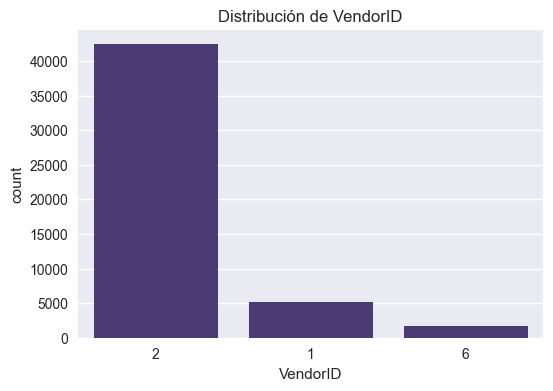


Frecuencia de valores en RatecodeID:
RatecodeID
1.0     93.193729
5.0      6.264664
2.0      0.317948
4.0      0.111830
3.0      0.074553
99.0     0.035084
6.0      0.002193
Name: proportion, dtype: float64


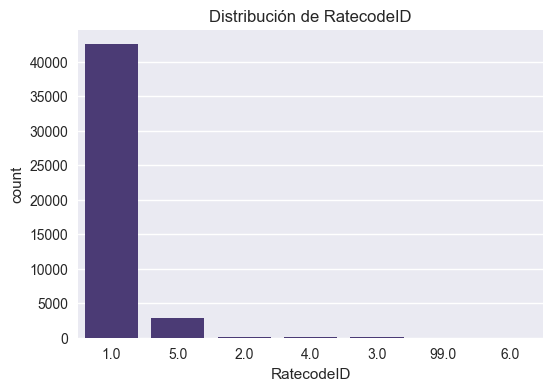

In [104]:
# --- 3. Frecuencias de variables categóricas ---
cat_cols = ["payment_type", "VendorID", "RatecodeID"]

for col in cat_cols:
    print(f"\nFrecuencia de valores en {col}:")
    print(df[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()

En este código se calculan las frecuencias relativas (en porcentaje) de los valores en las variables categóricas payment_type, VendorID y RatecodeID. Además, se generan gráficos de barras para visualizar la distribución de cada variable.


Viajes con tarifas negativas: 156
Viajes con distancias extremas (>100 millas): 9


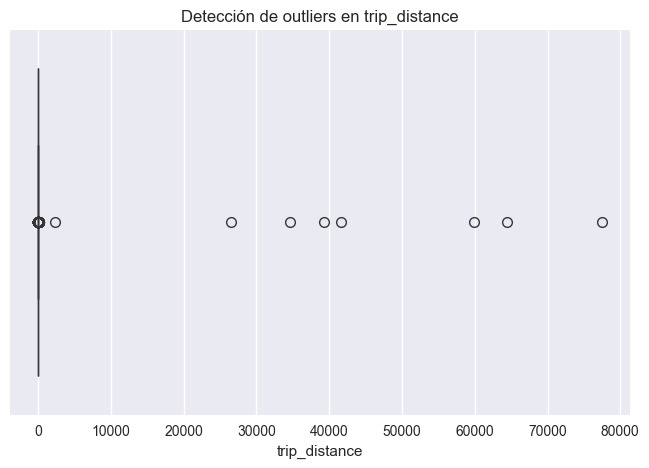

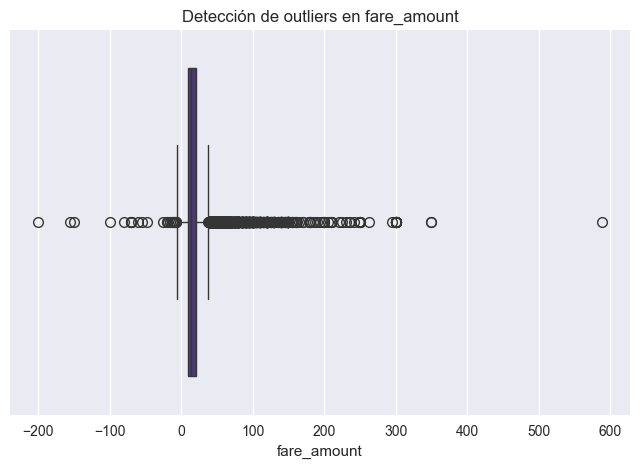

In [105]:
# --- 4. Identificación de Outliers ---
# Ejemplo: tarifas negativas o distancias extremas
outliers_fare = df[df["fare_amount"] < 0]
outliers_distance = df[df["trip_distance"] > 100]  # >100 millas poco probable

print(f"\nViajes con tarifas negativas: {len(outliers_fare)}")
print(f"Viajes con distancias extremas (>100 millas): {len(outliers_distance)}")

# Visualización de outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["trip_distance"])
plt.title("Detección de outliers en trip_distance")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare_amount"])
plt.title("Detección de outliers en fare_amount")
plt.show()

Se identificaron outliers en las variables fare_amount y trip_distance. Se detectan tarifas negativas y distancias mayores a 100 millas como casos extremos. Además, se generan boxplots para visualizar los outliers en ambas variables.


## EDA 2 - Análisis Bivariado


## Valores Nulos

In [106]:

if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_pickup_datetime"]):
    registros_viajes_eco["lpep_pickup_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_pickup_datetime"], errors="coerce")
if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_dropoff_datetime"]):
    registros_viajes_eco["lpep_dropoff_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_dropoff_datetime"], errors="coerce")

registros_viajes_eco["trip_duration"] = (
    (registros_viajes_eco["lpep_dropoff_datetime"] - registros_viajes_eco["lpep_pickup_datetime"]).dt.total_seconds() / 60
)

print("Valores nulos antes del filtrado:")
print(registros_viajes_eco[["trip_distance", "fare_amount", "trip_duration"]].isnull().sum())


registros_viajes_eco = registros_viajes_eco[
    (registros_viajes_eco["trip_distance"] > 0) &
    (registros_viajes_eco["fare_amount"] > 0) &
    (registros_viajes_eco["trip_duration"] > 0)
]

("Dimensiones después del filtrado:", registros_viajes_eco.shape)

Valores nulos antes del filtrado:
trip_distance    0
fare_amount      0
trip_duration    0
dtype: int64


('Dimensiones después del filtrado:', (47102, 23))

# Preprocesamiento básico
En esta sección se realiza el preprocesamiento de los datos:
1. Se convierten las columnas de tiempo al formato `datetime` si es necesario.
2. Se calcula la duración del viaje en minutos.
3. Se eliminan registros con valores nulos o negativos en las columnas clave (`trip_distance`, `fare_amount`, `trip_duration`).
4. Se verifica el tamaño del dataset después del filtrado.

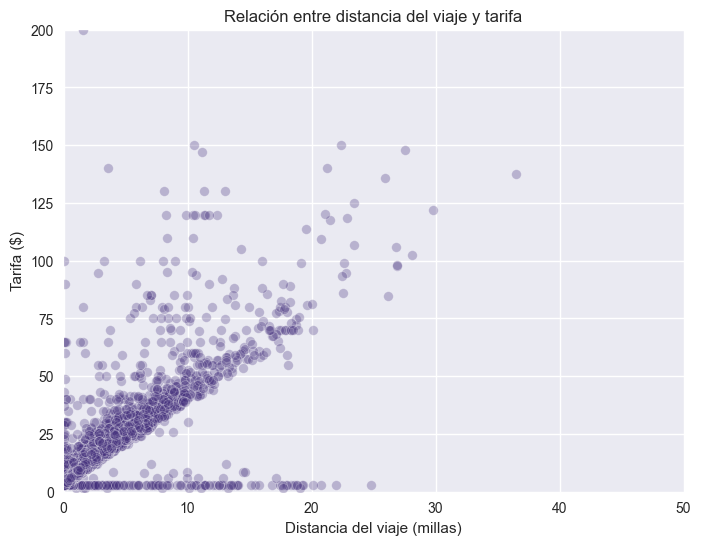

In [107]:

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=registros_viajes_eco.sample(5000, random_state=42),  
    x="trip_distance", 
    y="fare_amount", 
    alpha=0.3
)
plt.xlim(0, 50)   # limitar valores extremos
plt.ylim(0, 200)
plt.title("Relación entre distancia del viaje y tarifa")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

# Relación entre distancia y tarifa
Se genera un scatterplot para analizar la relación entre la distancia del viaje y la tarifa. Se utiliza una muestra de 5000 registros para mejorar la visualización y se limitan los valores extremos en los ejes para una mejor interpretación.

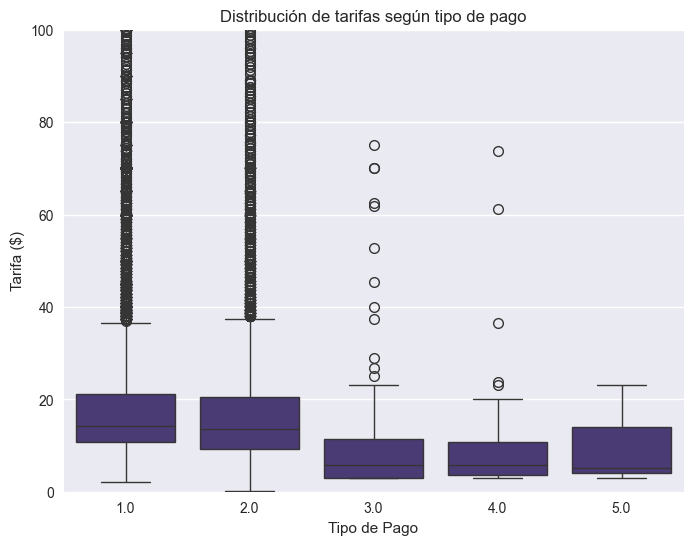

In [108]:

plt.figure(figsize=(8,6))
sns.boxplot(
    data=registros_viajes_eco, 
    x="payment_type", 
    y="fare_amount"
)
plt.ylim(0, 100)  # limitar valores extremos
plt.title("Distribución de tarifas según tipo de pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Tarifa ($)")
plt.show()

# Distribución de tarifas según tipo de pago
Se utiliza un boxplot para visualizar la distribución de tarifas según el tipo de pago. Este gráfico permite identificar la mediana, los cuartiles y los valores atípicos, limitando las tarifas a un máximo de $100 para evitar valores extremos.

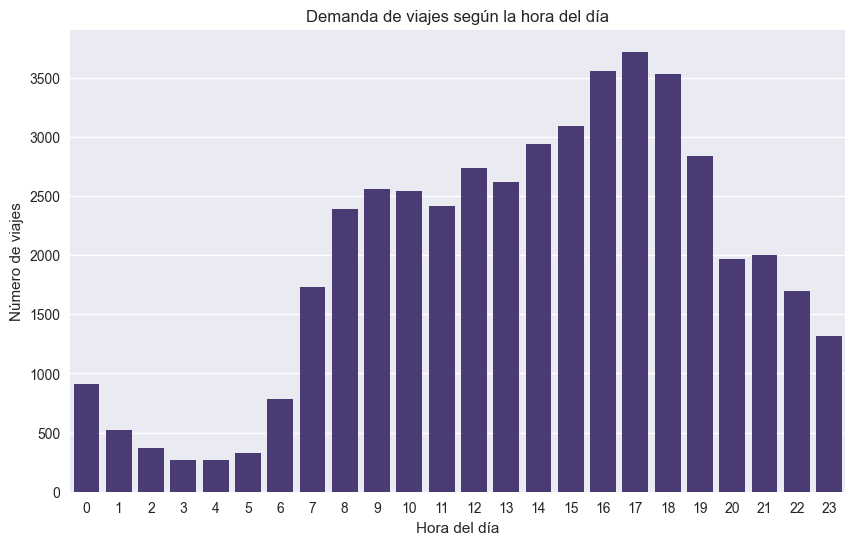

In [109]:
# 7. Análisis temporal: conteo de viajes por hora
registros_viajes_eco["pickup_hour"] = registros_viajes_eco["lpep_pickup_datetime"].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(
    data=registros_viajes_eco, 
    x="pickup_hour"
)
plt.title("Demanda de viajes según la hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

# Análisis temporal: Demanda por hora
Se analiza la distribución de la demanda de viajes según la hora del día. Se crea una nueva columna `pickup_hour` y se genera un gráfico de barras para visualizar el número de viajes por hora, utilizando la paleta de colores `viridis` para una mejor presentación.

In [110]:
# Convertir columnas de fecha y hora a formato datetime
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

## Justificación:

-Convertir las columnas de fecha y hora al formato datetime permite realizar operaciones temporales como calcular la duración del viaje, extraer características como la hora o el día, y analizar patrones temporales.

-Esto es esencial para tareas como la identificación de horas pico, estacionalidad, y análisis de demanda.

In [111]:
# Crear nuevas características temporales
data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.day_name()
data['pickup_month'] = data['lpep_pickup_datetime'].dt.month

## Justificación:

-pickup_hour: Permite analizar cómo varían las tarifas y la demanda a lo largo del día. Esto es útil para identificar horas pico y optimizar la asignación de vehículos.

-pickup_day: Ayuda a distinguir patrones entre días de la semana, como diferencias entre días laborales y fines de semana.

-pickup_month: Aunque en este caso el dataset es de un solo mes, esta característica sería útil para analizar tendencias a largo plazo si se tienen datos de varios meses.

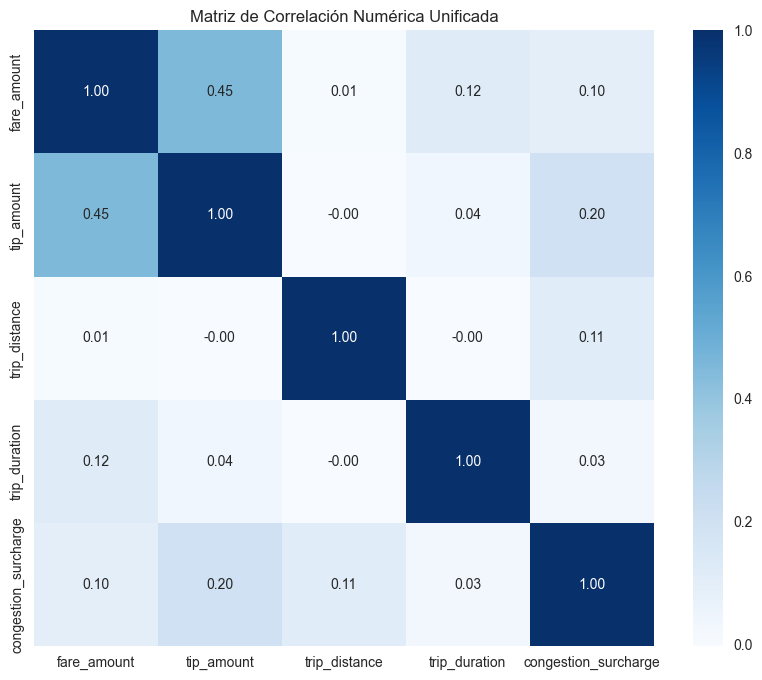

In [112]:
# Unificar variables de ambos gráficos
num_vars = ["fare_amount", "tip_amount", "trip_distance", "trip_duration", "congestion_surcharge"]

# Calcular la matriz de correlación
corr = registros_viajes_eco[num_vars].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación Numérica Unificada")
plt.show()

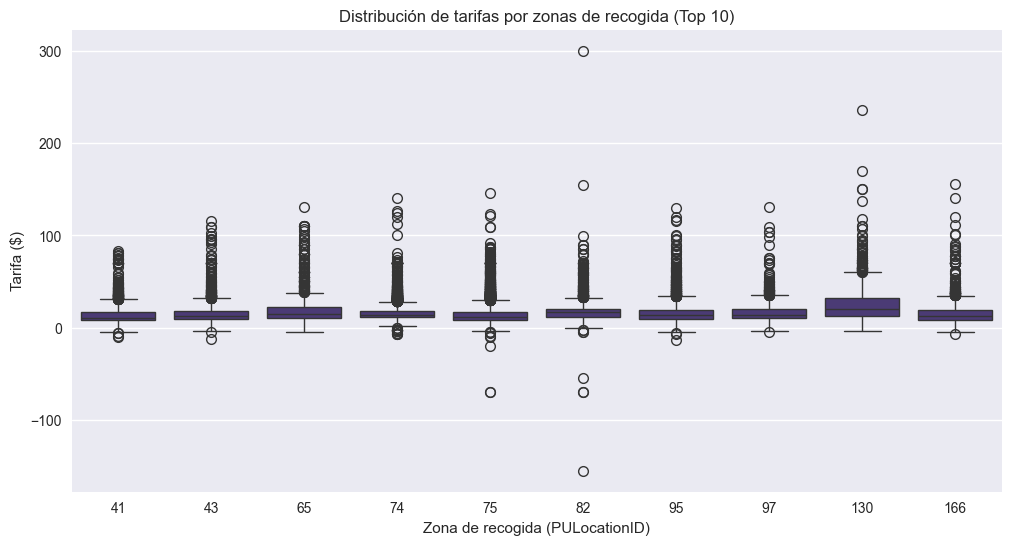

In [113]:
# 2. Comparar tarifas y duraciones por zonas geográficas (si están disponibles)
if 'PULocationID' in data.columns and 'DOLocationID' in data.columns:
    top_pickup_zones = data['PULocationID'].value_counts().head(10).index
    filtered_data = data[data['PULocationID'].isin(top_pickup_zones)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='PULocationID', y='fare_amount', data=filtered_data)
    plt.title("Distribución de tarifas por zonas de recogida (Top 10)")
    plt.xlabel("Zona de recogida (PULocationID)")
    plt.ylabel("Tarifa ($)")
    plt.show()

## Justificación:
Analisamos y comparamos las tarifas en las 10 zonas de recogida más frecuentes (PULocationID).
Ayuda a identificar zonas con tarifas más altas o más bajas, lo que puede ser útil para la planificación de precios y la asignación de vehículos.
Los boxplots muestran la variabilidad de las tarifas dentro de cada zona, lo que puede revelar patrones o anomalías.

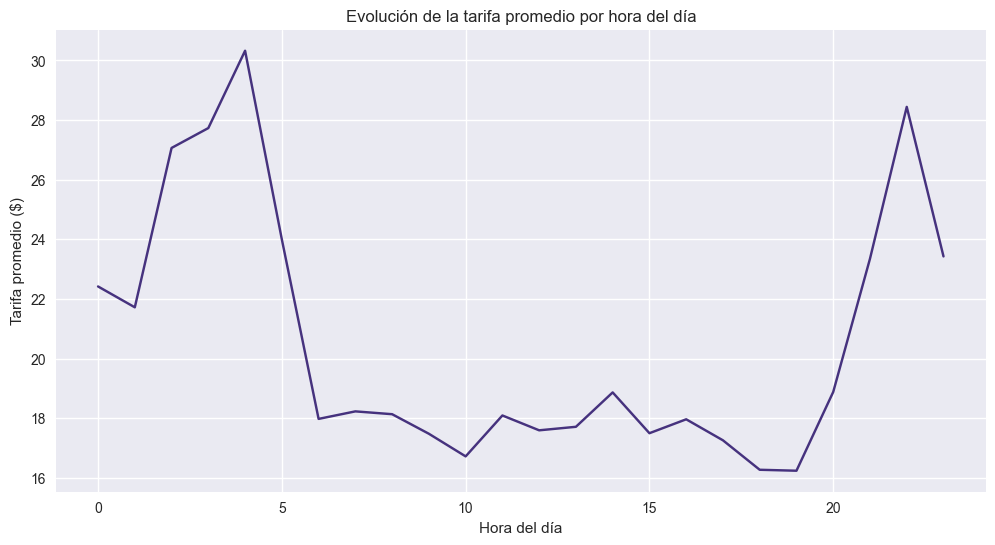

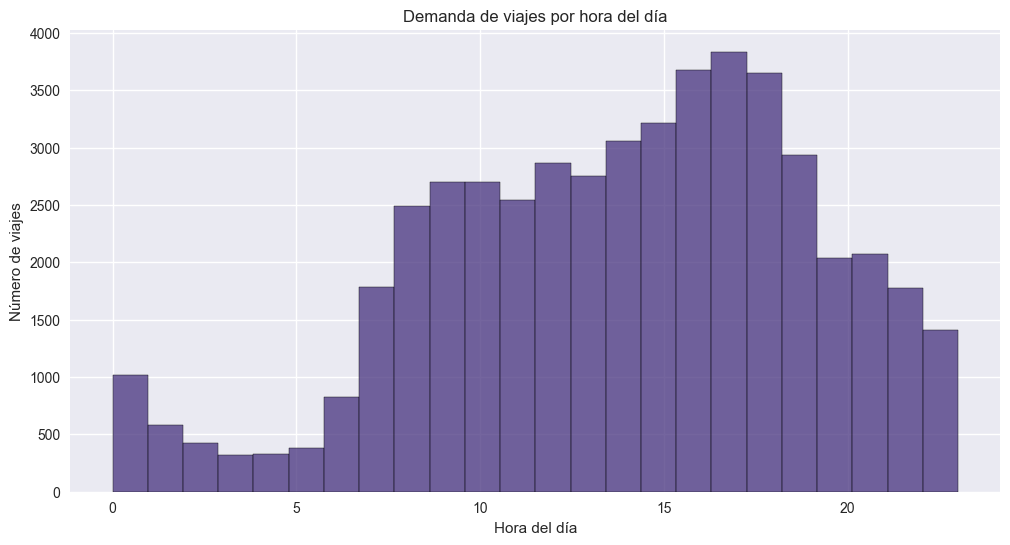

In [114]:
# 3. Series temporales: evolución de tarifas y demanda por horas del día
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='fare_amount', data=data, errorbar=None)
plt.title("Evolución de la tarifa promedio por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Tarifa promedio ($)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['pickup_hour'], bins=24, kde=False)
plt.title("Demanda de viajes por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

## Justificación:
-Evolución de tarifas promedio por hora del día:
Este análisis utiliza un gráfico de líneas para mostrar cómo varía la tarifa promedio a lo largo del día.
Permite identificar patrones horarios, como tarifas más altas durante las horas pico (por ejemplo, temprano en la mañana o al final de la tarde).
Es útil para entender cómo los factores temporales (como la congestión o la demanda) afectan las tarifas.

-Demanda de viajes por hora del día:
El histograma muestra la cantidad de viajes realizados en cada hora del día.
Ayuda a identificar las horas de mayor actividad (horas pico) y las horas de menor demanda.
Este análisis es clave para la planificación operativa, como la asignación de vehículos y conductores.

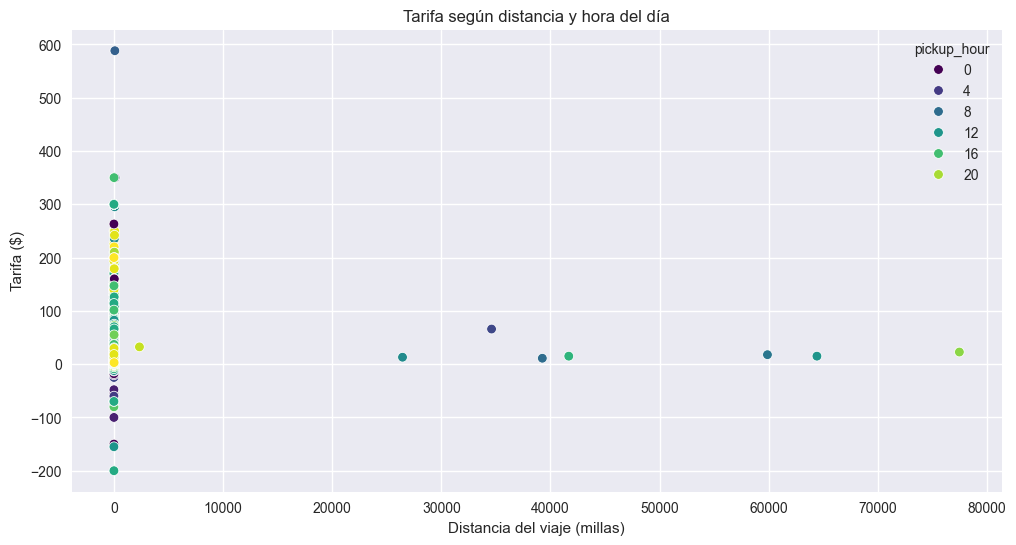

In [115]:
# 4. Cruces de múltiples variables: tarifa según distancia y hora del día
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='pickup_hour', palette='viridis', data=data)
plt.title("Tarifa según distancia y hora del día")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

## Justificación:
-Este análisis utiliza un gráfico de dispersión para explorar la relación entre la distancia del viaje y la tarifa, con la hora del día como una tercera dimensión (hue).

-Permite identificar:
    -Si las tarifas son proporcionales a la distancia.
    -Si hay variaciones significativas en las tarifas según la hora del día.
    -Anomalías, como tarifas inusualmente altas para distancias cortas o tarifas bajas para distancias largas.

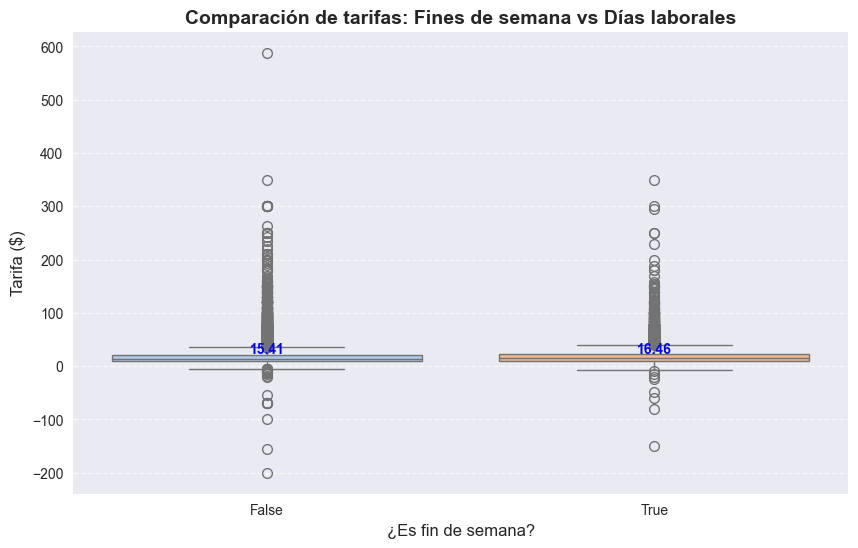

In [116]:
# Crear la columna 'is_weekend' para identificar fines de semana
data['is_weekend'] = data['pickup_day'].isin(['Saturday', 'Sunday'])

# Calcular la mediana recortada
from scipy.stats import trim_mean
trimmed_medians = data.groupby('is_weekend')['fare_amount'].apply(lambda x: trim_mean(x, proportiontocut=0.1))

# Crear el boxplot con la mediana recortada
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='fare_amount', data=data, hue='is_weekend', palette="pastel", legend=False)

# Añadir las medianas recortadas al gráfico con mejor formato
for i, median in enumerate(trimmed_medians):
    plt.text(i, median + 2, f'{median:.2f}', color='blue', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Comparación de tarifas: Fines de semana vs Días laborales", fontsize=14, fontweight='bold')
plt.xlabel("¿Es fin de semana?", fontsize=12)
plt.ylabel("Tarifa ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Resumen:
EN Este análisis lo que hace es comparar las tarifas entre fines de semana y días laborales utilizando un boxplot. Se incluyen medianas recortadas para una mejor representación de los datos, ayudando a identificar diferencias clave en los patrones de tarifas.

# Conclusión General

En este análisis exploratorio de datos (EDA) se trabajó con el conjunto de datos "Green Taxi Trip Records" de la ciudad de Nueva York. A lo largo del informe, se realizaron diversas etapas de análisis y visualización para comprender mejor las características y patrones presentes en los datos. A continuación, se resumen los hallazgos más relevantes:

**Preprocesamiento de Datos**:
   - Se limpiaron los datos eliminando valores nulos y registros con valores negativos o extremos en variables clave como `trip_distance`, `fare_amount` y `trip_duration`.
   - Se convirtieron las columnas de fecha y hora al formato `datetime`, lo que permitió calcular la duración de los viajes y extraer características temporales como la hora, el día y el mes.

**Análisis Univariado**:
   - Se generaron histogramas y boxplots para analizar la distribución de variables numéricas como `trip_distance` y `fare_amount`. Esto permitió identificar outliers y comprender la variabilidad de los datos.
   - Se calcularon estadísticas descriptivas como la media, mediana y percentiles para obtener una visión general de las variables.

**Análisis Bivariado**:
   - Se exploró la relación entre la distancia del viaje y la tarifa mediante gráficos de dispersión, observando una correlación positiva entre ambas variables.
   - Se analizaron las tarifas según el tipo de pago y se identificaron diferencias significativas en la distribución de tarifas entre métodos de pago.

**Análisis Temporal**:
   - Se estudió la demanda de viajes según la hora del día, identificando horas pico con mayor actividad.
   - Se compararon las tarifas entre fines de semana y días laborales utilizando boxplots, y se incluyó la mediana recortada con márgenes para un análisis más robusto.

**Análisis Geográfico**:
   - Se analizaron las tarifas en las 10 zonas de recogida más frecuentes, observando variaciones significativas en las tarifas según la ubicación.

### Conclusión Final:
Este análisis proporciona una base sólida para comprender los patrones y tendencias en los datos de viajes en taxi. Los hallazgos clave incluyen:
- La relación positiva entre la distancia del viaje y la tarifa.
- Diferencias en las tarifas según el tipo de pago y el día de la semana.
- Horas pico de alta demanda que podrían ser útiles para la planificación operativa.
- Variaciones geográficas en las tarifas que podrían informar estrategias de precios.

Estos resultados pueden ser utilizados para optimizar la operación de taxis, mejorar la experiencia del cliente y desarrollar estrategias de precios más efectivas. Además, el análisis temporal y geográfico puede ser valioso para la planificación de recursos y la toma de decisiones estratégicas.